# 2.3.0 More on Numeric Vectors: Transforming Tweets

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS 
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [10]:
import sys
sys.path.append("../") 

from utils.info3 import text_tweet
from utils.paths import make_dir_line

modality = 'c'
project = 'sentiment_analysis_in_python'
data = make_dir_line(modality, project)

raw = data('raw')
processed = data('processed')

## 2.3.2 Word cloud of tweets

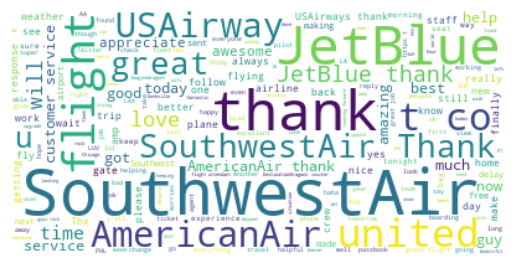

In [11]:
# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white').generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

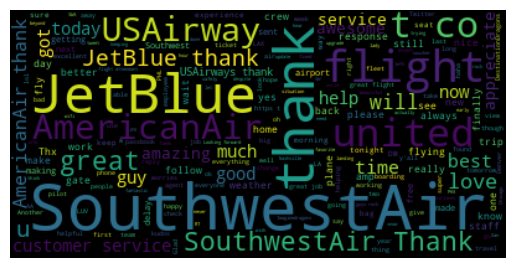

In [16]:
# Define and update the list of stopwords
my_stop_words = STOPWORDS.update(['airline', 'airplane'])

# Create and generate a word cloud image
my_cloud = WordCloud(stopwords=my_stop_words).generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

## 2.3.3 Airline sentiment with stop words

In [19]:
tweets = pd.read_csv(raw / "Tweets.csv", sep=',')
tweets = tweets.loc[:,['airline_sentiment', 'text']]
tweets = tweets.iloc[0:1000]
tweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [23]:
# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])

# Build and fit the vectorizer
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(tweets.text)

# Create the bow representation
X_review = vect.transform(tweets.text)
# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

   00  000  000114  000419  0011  0016  0162424965446  0185  0530  0736  0769  \
0   0    0       0       0     0     0              0     0     0     0     0   
1   0    0       0       0     0     0              0     0     0     0     0   
2   0    0       0       0     0     0              0     0     0     0     0   
3   0    0       0       0     0     0              0     0     0     0     0   
4   0    0       0       0     0     0              0     0     0     0     0   

   08  0_0  10  100  1000  1000cost  1001  1016  1032  10pm  11  110  112  \
0   0    0   0    0     0         0     0     0     0     0   0    0    0   
1   0    0   0    0     0         0     0     0     0     0   0    0    0   
2   0    0   0    0     0         0     0     0     0     0   0    0    0   
3   0    0   0    0     0         0     0     0     0     0   0    0    0   
4   0    0   0    0     0         0     0     0     0     0   0    0    0   

   1146  12  120  1230  1235  1249  130  14  140  

## 2.3.4 Multiple text columns

In [4]:
print('ok_')

ok_
